# Analyze CLR transform data between treatment conditions

## Result from PERMANOVA of CLR treatment (Code at bottom)

| Dataset | P-value | R^2 value |
| --------------- | --------------- | --------------- |
| WGS (Timepoint 2) | 0.038 | 0.195847 |
| WGS (Timepoint 5) | 0.068 | 0.1459338 |
| Metabolite (Timepoint 2) | 0.001 | 0.2807557 |
| Metabolite (Timepoint 5) | 0.021 | 0.1099516 |

## NMDS Plots

In [3]:
library(vegan)
library(ggplot2)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


### T2 WGS

'comm' has negative data: 'autotransform', 'noshare' and 'wascores' set to FALSE


Run 0 stress 0.0563165 
Run 1 stress 0.06439327 
Run 2 stress 0.06833725 
Run 3 stress 0.06206354 
Run 4 stress 0.06187339 
Run 5 stress 0.06534328 
Run 6 stress 0.0563157 
... New best solution
... Procrustes: rmse 0.001087806  max resid 0.003102906 
... Similar to previous best
Run 7 stress 0.06350083 
Run 8 stress 0.05584886 
... New best solution
... Procrustes: rmse 0.01690531  max resid 0.06403047 
Run 9 stress 0.06875406 
Run 10 stress 0.0633061 
Run 11 stress 0.05475197 
... New best solution
... Procrustes: rmse 0.01272724  max resid 0.06684644 
Run 12 stress 0.06036018 
Run 13 stress 0.05744527 
Run 14 stress 0.06660745 
Run 15 stress 0.05744833 
Run 16 stress 0.05868081 
Run 17 stress 0.06291522 
Run 18 stress 0.06799482 
Run 19 stress 0.0659439 
Run 20 stress 0.05756074 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


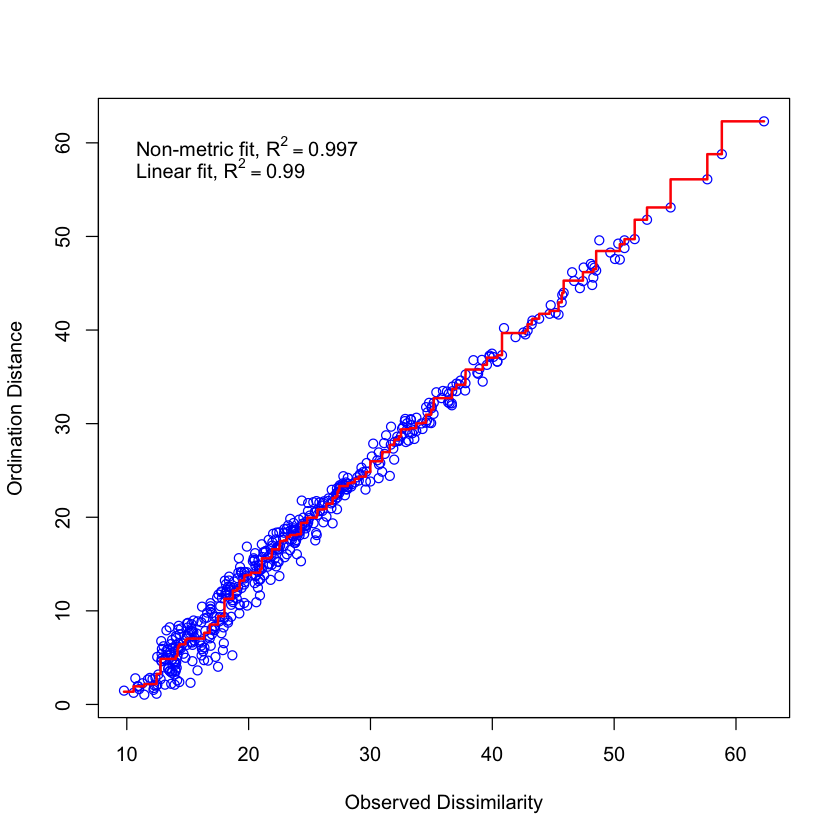

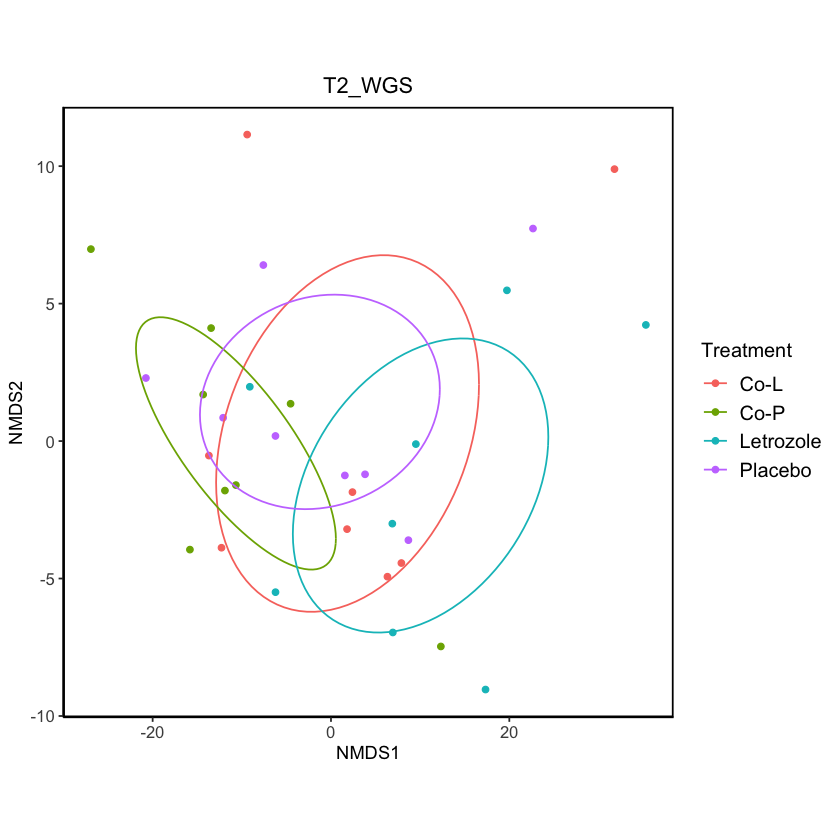

In [9]:
T2_df_raw = read.csv("T2_WGS_clr.csv", row.names = 1)
T2_df = T2_df_raw
T2_df$Treatment = NULL
T2_NMDS = metaMDS(T2_df, distance = "euclidean")

# As a rule of thumb literature has identified the following cut-off values for stress-level:
# Higher than 0.2 is poor (risks for false interpretation).
# 0.1 - 0.2 is fair (some distances can be misleading for interpretation).
# 0.05 - 0.1 is good (can be confident in inferences from plot).
# Less than 0.05 is excellent (this can be rare).

stressplot(T2_NMDS) # Use this to example fit of data after metaMDS transformation

# Adjust NMDS data into dataframe for plotting with ggplot
sample_score = as.data.frame(scores(T2_NMDS, display = "sites"))
sample_score <- cbind(sample_score, Treatment = T2_df_raw$Treatment)

# ggplot for visualization
veganCovEllipse <- function (cov, center = c(0, 0), scale = 1, npoints = 100) 
{
  theta <- (0:npoints) * 2 * pi/npoints
  Circle <- cbind(cos(theta), sin(theta))
  t(center + scale * t(Circle %*% chol(cov)))
}

#data for ellipse, in this case using the management factor
sample_score_treatment <- data.frame() #sets up a data frame before running the function.
for(g in levels(sample_score$Treatment)){
  sample_score_treatment <- rbind(sample_score_treatment, cbind(as.data.frame(with(sample_score [sample_score$Treatment==g,],
                                                         veganCovEllipse(cov.wt(cbind(NMDS1,NMDS2),wt=rep(1/length(NMDS1),length(NMDS1)))$cov,center=c(mean(NMDS1),mean(NMDS2))))) ,Treatment=g))
}


nmds.plot <- ggplot(sample_score, aes(x=NMDS1, y=NMDS2))+ #sets up the plot
  geom_point(aes(NMDS1, NMDS2, colour = factor(sample_score$Treatment)))+ #adds site points to plot, colour determined by Treatment
  coord_fixed()+
  theme_classic()+ 
  theme(panel.background = element_rect(fill = NA, colour = "black", size = 1, linetype = "solid"), aspect.ratio = 1)+
  labs(colour = "Treatment") + 
  theme(legend.position = "right", legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.text = element_text(size = 10)) # add legend at right of plot

nmds.plot + ggtitle("T2_WGS")+ theme(plot.title = element_text(hjust = 0.5)) + 
geom_path(data = sample_score_treatment, aes(x = NMDS1, y = NMDS2, color = Treatment)) #displays plot

### T5 WGS

'comm' has negative data: 'autotransform', 'noshare' and 'wascores' set to FALSE


Run 0 stress 0.08466013 
Run 1 stress 0.09185785 
Run 2 stress 0.08364911 
... New best solution
... Procrustes: rmse 0.01621234  max resid 0.06674966 
Run 3 stress 0.08744333 
Run 4 stress 0.08250691 
... New best solution
... Procrustes: rmse 0.07941678  max resid 0.1624473 
Run 5 stress 0.08411064 
Run 6 stress 0.09649799 
Run 7 stress 0.08744161 
Run 8 stress 0.08241513 
... New best solution
... Procrustes: rmse 0.009255203  max resid 0.03580667 
Run 9 stress 0.08277473 
... Procrustes: rmse 0.008536532  max resid 0.04011277 
Run 10 stress 0.087546 
Run 11 stress 0.08759706 
Run 12 stress 0.08411196 
Run 13 stress 0.08339108 
Run 14 stress 0.08744481 
Run 15 stress 0.09799438 
Run 16 stress 0.08277265 
... Procrustes: rmse 0.008533626  max resid 0.03999102 
Run 17 stress 0.0874401 
Run 18 stress 0.09498533 
Run 19 stress 0.08411412 
Run 20 stress 0.09590198 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


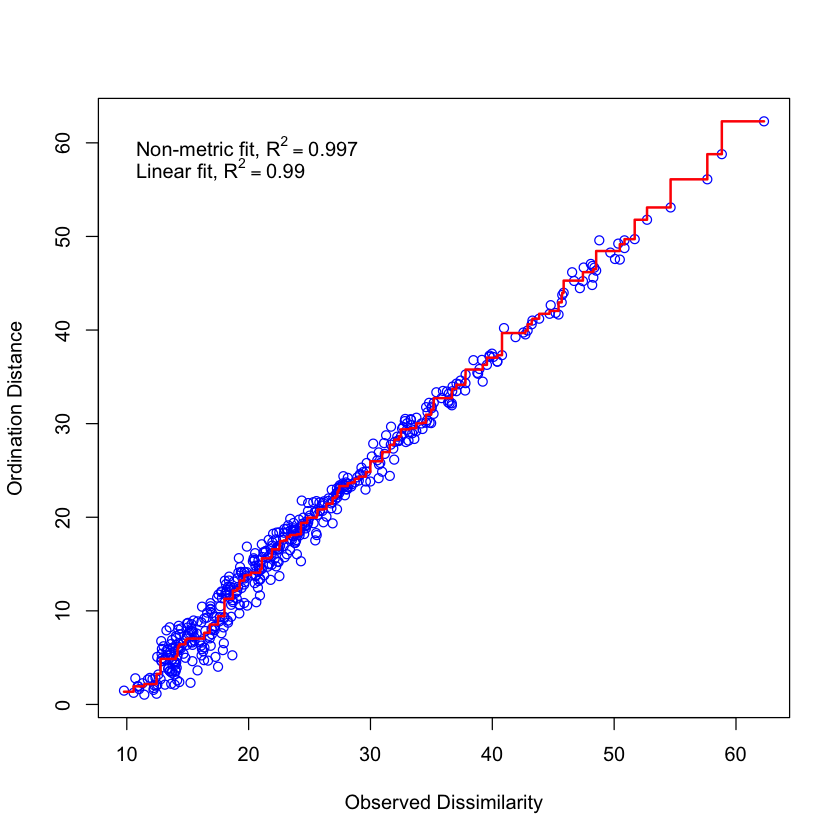

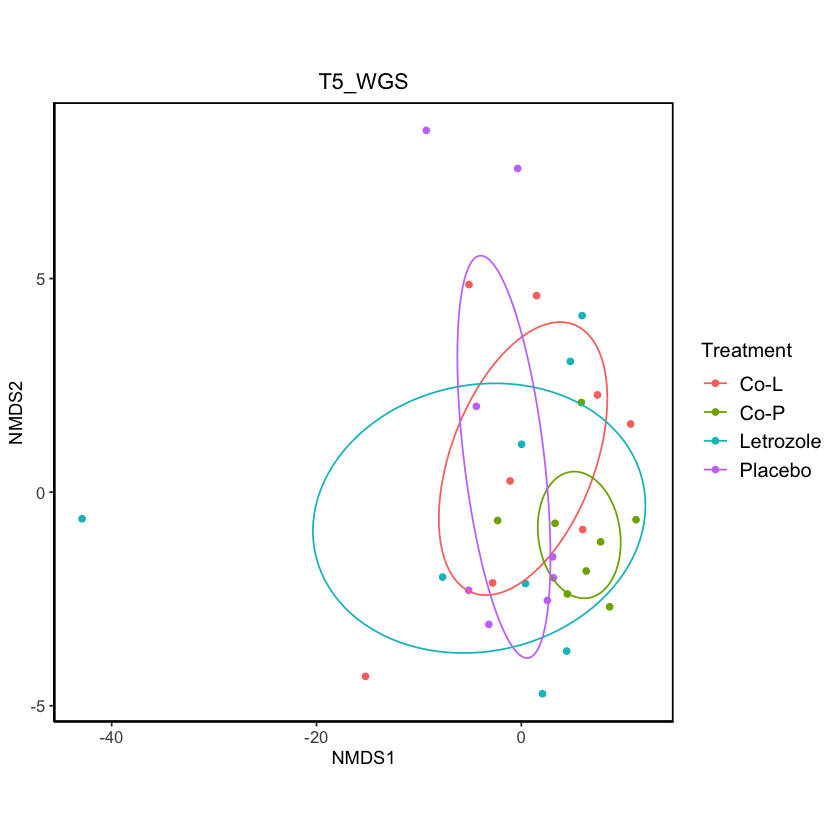

In [11]:
T5_df_raw = read.csv("T5_WGS_clr.csv", row.names = 1)
T5_df = T5_df_raw
T5_df$Treatment = NULL
T5_NMDS = metaMDS(T5_df, distance = "euclidean")

stressplot(T2_NMDS)

sample_score = as.data.frame(scores(T5_NMDS, display = "sites"))
sample_score <- cbind(sample_score, Treatment = T5_df_raw$Treatment)

veganCovEllipse <- function (cov, center = c(0, 0), scale = 1, npoints = 100) 
{
  theta <- (0:npoints) * 2 * pi/npoints
  Circle <- cbind(cos(theta), sin(theta))
  t(center + scale * t(Circle %*% chol(cov)))
}

#data for ellipse, in this case using the management factor
sample_score_treatment <- data.frame() #sets up a data frame before running the function.
for(g in levels(sample_score$Treatment)){
  sample_score_treatment <- rbind(sample_score_treatment, cbind(as.data.frame(with(sample_score [sample_score$Treatment==g,],
                                                         veganCovEllipse(cov.wt(cbind(NMDS1,NMDS2),wt=rep(1/length(NMDS1),length(NMDS1)))$cov,center=c(mean(NMDS1),mean(NMDS2))))) ,Treatment=g))
}


nmds.plot <- ggplot(sample_score, aes(x=NMDS1, y=NMDS2))+ #sets up the plot
  geom_point(aes(NMDS1, NMDS2, colour = factor(sample_score$Treatment)))+ #adds site points to plot, colour determined by Treatment
  coord_fixed()+
  theme_classic()+ 
  theme(panel.background = element_rect(fill = NA, colour = "black", size = 1, linetype = "solid"), aspect.ratio = 1)+
  labs(colour = "Treatment") + 
  theme(legend.position = "right", legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.text = element_text(size = 10)) # add legend at right of plot

nmds.plot + ggtitle("T5_WGS")+ theme(plot.title = element_text(hjust = 0.5)) + 
geom_path(data = sample_score_treatment, aes(x = NMDS1, y = NMDS2, color = Treatment))#displays plot

### T2 Metabolites

'comm' has negative data: 'autotransform', 'noshare' and 'wascores' set to FALSE


Run 0 stress 0.08452404 
Run 1 stress 0.09178096 
Run 2 stress 0.08585254 
Run 3 stress 0.08916327 
Run 4 stress 0.08957676 
Run 5 stress 0.08585429 
Run 6 stress 0.09823477 
Run 7 stress 0.09688938 
Run 8 stress 0.08948429 
Run 9 stress 0.08452376 
... New best solution
... Procrustes: rmse 6.969442e-05  max resid 0.0001791326 
... Similar to previous best
Run 10 stress 0.08916316 
Run 11 stress 0.08869189 
Run 12 stress 0.08452373 
... New best solution
... Procrustes: rmse 4.005762e-05  max resid 0.0001174605 
... Similar to previous best
Run 13 stress 0.0904454 
Run 14 stress 0.08710173 
Run 15 stress 0.09508259 
Run 16 stress 0.08777533 
Run 17 stress 0.08751925 
Run 18 stress 0.08585268 
Run 19 stress 0.08950422 
Run 20 stress 0.0886923 
*** Solution reached


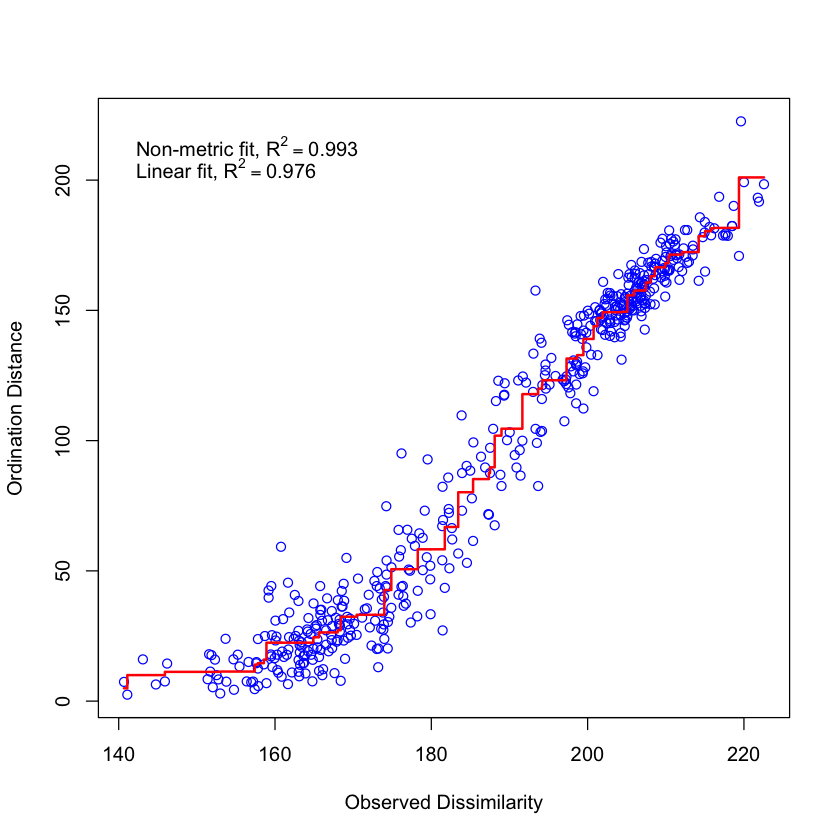

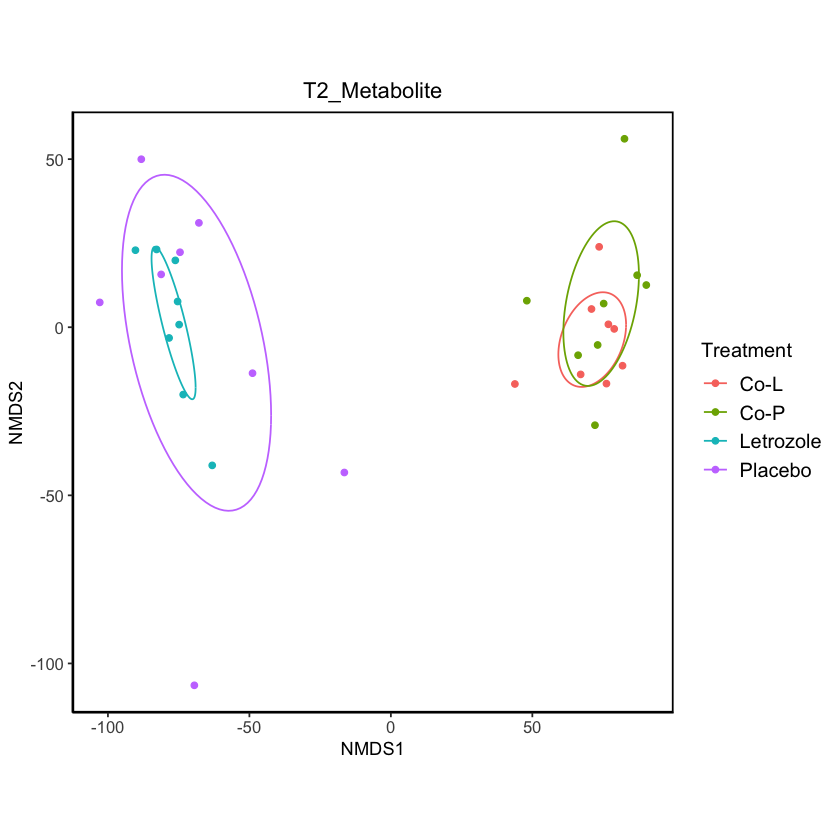

In [12]:
T2_meta_df_raw = read.csv("T2_meta_clr.csv", row.names = 1)
T2_meta_df = T2_meta_df_raw
T2_meta_df$Treatment = NULL
T2_meta_NMDS = metaMDS(T2_meta_df, distance = "euclidean")

stressplot(T2_meta_NMDS)

sample_score = as.data.frame(scores(T2_meta_NMDS, display = "sites"))
sample_score <- cbind(sample_score, Treatment = T2_meta_df_raw$Treatment)

veganCovEllipse <- function (cov, center = c(0, 0), scale = 1, npoints = 100) 
{
  theta <- (0:npoints) * 2 * pi/npoints
  Circle <- cbind(cos(theta), sin(theta))
  t(center + scale * t(Circle %*% chol(cov)))
}

#data for ellipse, in this case using the management factor
sample_score_treatment <- data.frame() #sets up a data frame before running the function.
for(g in levels(sample_score$Treatment)){
  sample_score_treatment <- rbind(sample_score_treatment, cbind(as.data.frame(with(sample_score [sample_score$Treatment==g,],
                                                         veganCovEllipse(cov.wt(cbind(NMDS1,NMDS2),wt=rep(1/length(NMDS1),length(NMDS1)))$cov,center=c(mean(NMDS1),mean(NMDS2))))) ,Treatment=g))
}


nmds.plot <- ggplot(sample_score, aes(x=NMDS1, y=NMDS2))+ #sets up the plot
  geom_point(aes(NMDS1, NMDS2, colour = factor(sample_score$Treatment)))+ #adds site points to plot, colour determined by Treatment
  coord_fixed()+
  theme_classic()+ 
  theme(panel.background = element_rect(fill = NA, colour = "black", size = 1, linetype = "solid"), aspect.ratio = 1)+
  labs(colour = "Treatment") + 
  theme(legend.position = "right", legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.text = element_text(size = 10)) # add legend at right of plot

nmds.plot + ggtitle("T2_Metabolite")+ theme(plot.title = element_text(hjust = 0.5)) + 
geom_path(data = sample_score_treatment, aes(x = NMDS1, y = NMDS2, color = Treatment))#displays plot

### T5 Metabolite

'comm' has negative data: 'autotransform', 'noshare' and 'wascores' set to FALSE


Run 0 stress 0.1953755 
Run 1 stress 0.1913031 
... New best solution
... Procrustes: rmse 0.1166545  max resid 0.4082756 
Run 2 stress 0.211943 
Run 3 stress 0.1872663 
... New best solution
... Procrustes: rmse 0.0405072  max resid 0.1500772 
Run 4 stress 0.2173825 
Run 5 stress 0.2003462 
Run 6 stress 0.2121453 
Run 7 stress 0.2016905 
Run 8 stress 0.2072761 
Run 9 stress 0.1955616 
Run 10 stress 0.2085975 
Run 11 stress 0.2177826 
Run 12 stress 0.2042449 
Run 13 stress 0.2041192 
Run 14 stress 0.211811 
Run 15 stress 0.1977104 
Run 16 stress 0.1871914 
... New best solution
... Procrustes: rmse 0.05465866  max resid 0.2116053 
Run 17 stress 0.2284627 
Run 18 stress 0.2429518 
Run 19 stress 0.2013634 
Run 20 stress 0.210678 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


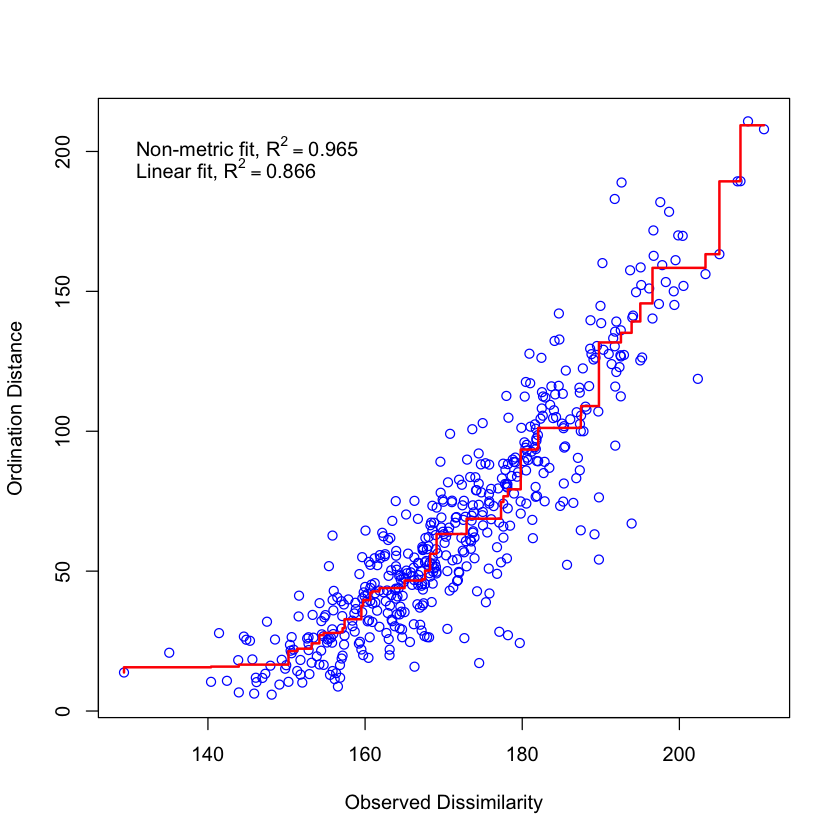

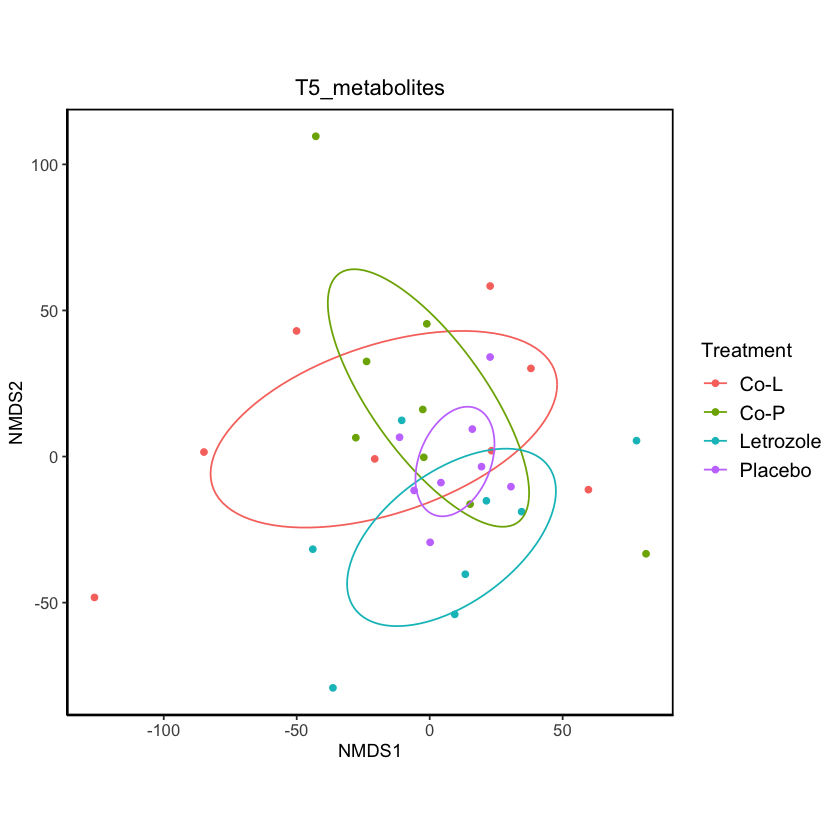

In [13]:
T5_meta_df_raw = read.csv("T5_meta_clr.csv", row.names = 1)
T5_meta_df = T5_meta_df_raw
T5_meta_df$Treatment = NULL
T5_meta_NMDS = metaMDS(T5_meta_df, distance = "euclidean")

stressplot(T5_meta_NMDS)

sample_score = as.data.frame(scores(T5_meta_NMDS, display = "sites"))
sample_score <- cbind(sample_score, Treatment = T5_meta_df_raw$Treatment)

veganCovEllipse <- function (cov, center = c(0, 0), scale = 1, npoints = 100) 
{
  theta <- (0:npoints) * 2 * pi/npoints
  Circle <- cbind(cos(theta), sin(theta))
  t(center + scale * t(Circle %*% chol(cov)))
}

#data for ellipse, in this case using the management factor
sample_score_treatment <- data.frame() #sets up a data frame before running the function.
for(g in levels(sample_score$Treatment)){
  sample_score_treatment <- rbind(sample_score_treatment, cbind(as.data.frame(with(sample_score [sample_score$Treatment==g,],
                                                         veganCovEllipse(cov.wt(cbind(NMDS1,NMDS2),wt=rep(1/length(NMDS1),length(NMDS1)))$cov,center=c(mean(NMDS1),mean(NMDS2))))) ,Treatment=g))
}


nmds.plot <- ggplot(sample_score, aes(x=NMDS1, y=NMDS2))+ #sets up the plot
  geom_point(aes(NMDS1, NMDS2, colour = factor(sample_score$Treatment)))+ #adds site points to plot, colour determined by Treatment
  coord_fixed()+
  theme_classic()+ 
  theme(panel.background = element_rect(fill = NA, colour = "black", size = 1, linetype = "solid"), aspect.ratio = 1)+
  labs(colour = "Treatment") + 
  theme(legend.position = "right", legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.text = element_text(size = 10)) # add legend at right of plot

nmds.plot + ggtitle("T5_metabolites")+ theme(plot.title = element_text(hjust = 0.5)) + 
geom_path(data = sample_score_treatment, aes(x = NMDS1, y = NMDS2, color = Treatment))#displays plot

## Permanova

### T2 WGS 

In [16]:
T2_WGS = read.csv("T2_WGS_clr_permanova.csv")
T2_mapping = read.csv("T2_mapping.csv")
T2_WGS.dist <- vegdist(T2_WGS, method="euclidean")
T2_WGS.div <- adonis2(T2_WGS ~ Treatment, data = T2_mapping, permutations = 999, method="euclidean")
T2_WGS.div

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,3,2136.383,0.195847,2.273082,0.035
Residual,28,8772.042,0.804153,NA,NA
Total,31,10908.425,1.000000,NA,NA


### T5 WGS

In [18]:
T5_meta = read.csv("T5_WGS_clr_permanova.csv")
T5_mapping = read.csv("T5_mapping.csv")
T5_meta.dist = vegdist(T5_meta, method="euclidean")
T5_meta.div = adonis2(T5_meta ~ Treatment, data = T5_mapping, permutations = 999, method="euclidean")
T5_meta.div

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,3,1052.936,0.1459338,1.594781,0.067
Residual,28,6162.229,0.8540662,NA,NA
Total,31,7215.166,1.0000000,NA,NA


### T2 Metabolite

In [19]:
T2_meta = read.csv("T2_meta_clr_permanova.csv")
T2_mapping = read.csv("T2_mapping.csv")
T2_meta.dist = vegdist(T2_meta, method="euclidean")
T2_meta.div = adonis2(T2_meta ~ Treatment, data = T2_mapping, permutations = 999, method="euclidean")
T2_meta.div

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,3,155002.7,0.2807557,3.64325,0.001
Residual,28,397088.2,0.7192443,NA,NA
Total,31,552090.9,1.0000000,NA,NA


### T5 Metabolite

In [20]:
T5_meta = read.csv("T5_meta_clr_permanova.csv")
T5_mapping = read.csv("T5_mapping.csv")
T5_meta.dist = vegdist(T5_meta, method="euclidean")
T5_meta.div = adonis2(T5_meta ~ Treatment, data = T5_mapping, permutations = 999, method="euclidean")
T5_meta.div

,Df,SumOfSqs,R2,F,Pr(>F)
Treatment,3,50482.28,0.1099516,1.152988,0.016
Residual,28,408649.62,0.8900484,NA,NA
Total,31,459131.90,1.0000000,NA,NA
